## Введение в обработку естественного языка

## Урок 2. Создание признакового пространства

1. Создайте мешок слов с помощью
sklearn.feature_extraction.text.CountVectorizer.fit_transform(). Применим его к 'tweet_stemmed'
и 'tweet_lemmatized' отдельно.

● Игнорируем слова, частота которых в документе строго превышает порог 0.9 с
помощью max_df.

● Ограничим количество слов, попадающий в мешок, с помощью max_features =
1000.

● Исключим стоп-слова с помощью stop_words='english'.

● Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с
помощью CountVectorizer.get_feature_names().

In [26]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, preprocessing, linear_model
from sklearn.metrics import accuracy_score

from sklearn.decomposition import TruncatedSVD

import warnings
warnings.filterwarnings("ignore")

In [2]:
combine_df = pd.read_pickle('tweets.pkl')
combine_df.head()

,id,label,tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thanks, lyft, credit, use, cause, offer, whee..."
2,3,0.0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]"
3,4,0.0,model love you take with you all the time in ur,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time, ur]","[model, love, take, time, ur]","[model, love, take, time, ur]"
4,5,0.0,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[factsguide, society, motivation]"


In [3]:
count_vectorizer_stemmed = CountVectorizer(max_df=0.9,
                                           max_features=1000,
                                           stop_words='english')

count_vectorizer_lemmatized = CountVectorizer(max_df=0.9,
                                              max_features=1000,
                                              stop_words='english')

In [4]:
tweet_stemmed = np.array(
    combine_df['tweet_stemmed'].apply(lambda x: ' '.join(x)))

tweet_lemmatized = np.array(
    combine_df['tweet_lemmatized'].apply(lambda x: ' '.join(x)))

In [5]:
# Создаем the Bag-of-Words модель
bag_of_words_stemmed = count_vectorizer_stemmed.fit_transform(tweet_stemmed)

# Отобразим Bag-of-Words модель как DataFrame
feature_names_stemmed = count_vectorizer_stemmed.get_feature_names()
pd.DataFrame(bag_of_words_stemmed.toarray(),
             columns=feature_names_stemmed).head()

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Создаем the Bag-of-Words модель
bag_of_words_lemmatized = count_vectorizer_lemmatized.fit_transform(tweet_lemmatized)

# Отобразим Bag-of-Words модель как DataFrame
feature_names_lemmatized = count_vectorizer_lemmatized.get_feature_names()
pd.DataFrame(bag_of_words_lemmatized.toarray(),
             columns=feature_names_lemmatized).head()

,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,...,year,yes,yesterday,yo,yoga,york,young,youtube,yr,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


2. Создайте мешок слов с помощью
sklearn.feature_extraction.text.TfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и
'tweet_lemmatized' отдельно.

● Игнорируем слова, частота которых в документе строго превышает порог 0.9 с
помощью max_df.

● Ограничим количество слов, попадающий в мешок, с помощью max_features =
1000.

● Исключим стоп-слова с помощью stop_words='english'.

● Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с
помощью TfidfVectorizer.get_feature_names().

In [7]:
tfidf_vectorizer_stemmed = TfidfVectorizer(max_df=0.9,
                                           max_features=1000,
                                           stop_words='english')

tfidf_vectorizer_lemmatized = TfidfVectorizer(max_df=0.9,
                                              max_features=1000,
                                              stop_words='english')

In [8]:
# Создаем the Bag-of-Words модель
bag_tfidf_stemmed = tfidf_vectorizer_stemmed.fit_transform(tweet_stemmed)

# Отобразим Bag-of-Words модель как DataFrame
feature_names_stemmed = tfidf_vectorizer_stemmed.get_feature_names()
pd.DataFrame(bag_tfidf_stemmed.toarray(),
             columns=feature_names_stemmed).head()

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Создаем the Bag-of-Words модель
bag_tfidf_lemmatized = tfidf_vectorizer_lemmatized.fit_transform(tweet_lemmatized)

# Отобразим Bag-of-Words модель как DataFrame
feature_names_lemmatized = tfidf_vectorizer_lemmatized.get_feature_names()
pd.DataFrame(bag_tfidf_lemmatized.toarray(),
             columns=feature_names_lemmatized).head()

,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,...,year,yes,yesterday,yo,yoga,york,young,youtube,yr,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


3. Проверьте ваши векторайзеры на корпусе который использовали на вебинаре, составьте
таблицу метод векторизации и скор который вы получили (в методах векторизации по
изменяйте параметры что бы добиться лучшего скора) обратите внимание как
падает/растёт скор при уменьшении количества фичей, и изменении параметров, так же
попробуйте применить к векторайзерам PCA для сокращения размерности посмотрите на
качество сделайте выводы.

In [13]:
# Загрузка данных
data = open('Corpus.txt').read()
labels, texts = [], []
for i, line in enumerate(data.split("\n")):
    content = line.split()
    labels.append(content[0])
    texts.append(" ".join(content[1:]))

# Создание DataFrame
trainDF = pd.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels
trainDF.head()

,text,label
0,Stuning even for the non-gamer: This sound tra...,__label__2
1,The best soundtrack ever to anything.: I'm rea...,__label__2
2,Amazing!: This soundtrack is my favorite music...,__label__2
3,Excellent Soundtrack: I truly like this soundt...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After He...",__label__2


In [15]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(trainDF['text'], trainDF['label'])

In [16]:
classifier = linear_model.LogisticRegression()

encoder = preprocessing.LabelEncoder()

y_train = encoder.fit_transform(y_train)

y_test = encoder.fit_transform(y_test)

In [17]:
models = []

models.append(('CountVectorizer',
               CountVectorizer(analyzer='word',
                               token_pattern=r'\w{1,}',
                               stop_words='english')))

models.append(('TfidfVectorizer',
               TfidfVectorizer(analyzer='word',
                               token_pattern=r'\w{1,}',
                               stop_words='english')))

In [18]:
results = []

for name, model in models:

    model.fit(trainDF['text'])
    
    X_train_count = model.transform(X_train)
    X_test_count = model.transform(X_test)

    classifier.fit(X_train_count, y_train)
    predictions = classifier.predict(X_test_count)

    f1_score = accuracy_score(y_test, predictions)

    results.append((name, f1_score))

stock_model = pd.DataFrame(results, columns=['model', 'f1_score'])

stock_model.sort_values('f1_score', ascending=False)

,model,f1_score
1,TfidfVectorizer,0.8520
0,CountVectorizer,0.8436


### Подбор параметров

In [31]:
max_df = [1, 0.9, 0.7, 0.5, 0.25, 0.1]

max_features = [3000, 2000, 1500, 1000, 500, 200]

In [32]:
models = []

for i in max_df:
    for j in max_features:
        models.append((f'CountVectorizer_max_df{i}_max_feat{j}',
                       CountVectorizer(analyzer='word',
                                       token_pattern=r'\w{1,}',
                                       max_df=i,
                                       max_features=j,
                                       stop_words='english')))
        
        models.append((f'TfidfVectorizer_max_df{i}_max_feat{j}',
                       TfidfVectorizer(analyzer='word',
                                       token_pattern=r'\w{1,}',
                                       max_df=i,
                                       max_features=j,
                                       stop_words='english')))

In [33]:
results = []

for name, model in models:

    model.fit(trainDF['text'])
    
    X_train_count = model.transform(X_train)
    X_test_count = model.transform(X_test)

    classifier.fit(X_train_count, y_train)
    predictions = classifier.predict(X_test_count)

    f1_score = accuracy_score(y_test, predictions)

    results.append((name, f1_score))

different_models = pd.DataFrame(results, columns=['model', 'f1_score'])

different_models.sort_values('f1_score', ascending=False)

,model,f1_score
15,TfidfVectorizer_max_df0.9_max_feat2000,0.8536
27,TfidfVectorizer_max_df0.7_max_feat2000,0.8536
39,TfidfVectorizer_max_df0.5_max_feat2000,0.8536
51,TfidfVectorizer_max_df0.25_max_feat2000,0.8528
37,TfidfVectorizer_max_df0.5_max_feat3000,0.8524
...,...,...
5,TfidfVectorizer_max_df1_max_feat1500,0.5072
4,CountVectorizer_max_df1_max_feat1500,0.5072
3,TfidfVectorizer_max_df1_max_feat2000,0.5072
2,CountVectorizer_max_df1_max_feat2000,0.5072


In [34]:
final_result = pd.concat([different_models, stock_model], axis=0)

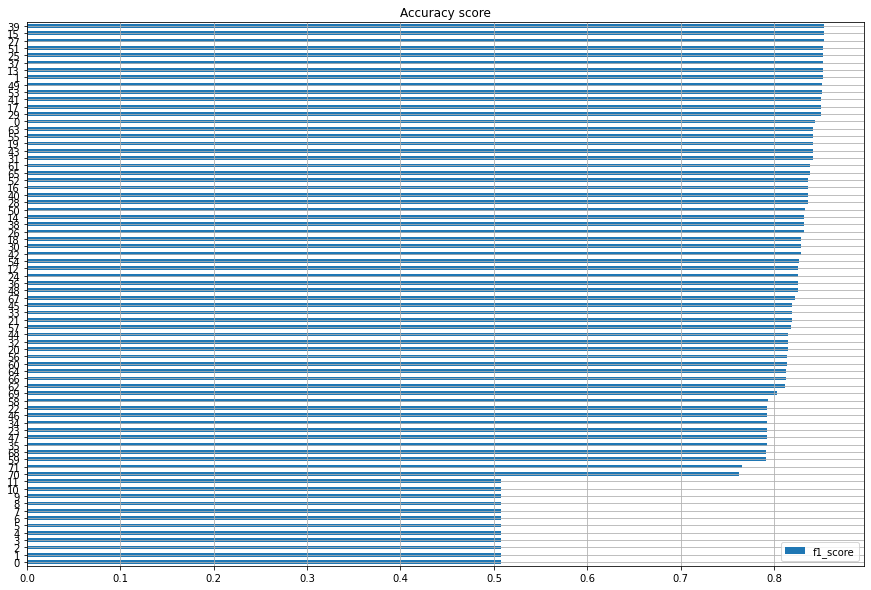

,model,f1_score
39,TfidfVectorizer_max_df0.5_max_feat2000,0.8536
27,TfidfVectorizer_max_df0.7_max_feat2000,0.8536
15,TfidfVectorizer_max_df0.9_max_feat2000,0.8536
51,TfidfVectorizer_max_df0.25_max_feat2000,0.8528
37,TfidfVectorizer_max_df0.5_max_feat3000,0.8524
...,...,...
6,CountVectorizer_max_df1_max_feat1000,0.5072
7,TfidfVectorizer_max_df1_max_feat1000,0.5072
11,TfidfVectorizer_max_df1_max_feat200,0.5072
10,CountVectorizer_max_df1_max_feat200,0.5072


In [35]:
final_result.sort_values('f1_score',
                         ascending=True).plot(kind='barh',
                                              grid=True,
                                              title='Accuracy score',
                                              figsize=(15, 10))

plt.show()

final_result.sort_values('f1_score', ascending=False)

In [36]:
models = []

models.append(('TfidfVectorizer',
               TfidfVectorizer(analyzer='word',
                               token_pattern=r'\w{1,}',
                               stop_words='english')))

In [37]:
results = []

for name, model in models:

    for n in [100, 350, 500, 1000]:
        
        model.fit(trainDF['text'])

        svd = TruncatedSVD(n_components=n, random_state=42, algorithm='arpack')

        X_train_count = model.transform(X_train)
        X_test_count = model.transform(X_test)

        X_train_count_svd = svd.fit_transform(X_train_count)
        X_test_count_svd = svd.transform(X_test_count)

        classifier.fit(X_train_count_svd, y_train)
        predictions = classifier.predict(X_test_count_svd)

        f1_score = accuracy_score(y_test, predictions)

        results.append((str(name) + '_' + str(n), f1_score))

pca_model = pd.DataFrame(results, columns=['model', 'f1_score'])

pca_model.sort_values('f1_score', ascending=False)

,model,f1_score
3,TfidfVectorizer_1000,0.8476
2,TfidfVectorizer_500,0.8424
1,TfidfVectorizer_350,0.8384
0,TfidfVectorizer_100,0.8196


**Наилучший результат показал TfidfVectorizer с параетрами max_df=0.5 и max_features=2000.**